## Installing Libraries and Dependencies

In [8]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

## Dataset Description and Preprocessing

In [2]:
train_path  = "dataset\\train"
valid_path  = "dataset\\val"
test_path   = "dataset\\test"

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [4]:
train_data_gen = ImageDataGenerator(
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 4997 images belonging to 2 classes.


In [5]:
validation_data_gen = ImageDataGenerator()

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 1000 images belonging to 2 classes.


In [6]:
test_data_gen = ImageDataGenerator()

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 999 images belonging to 2 classes.


In [7]:
class_type = {1:'Covid',  0 : 'Normal'}

In [8]:
t_img , label = train.next()

## Visualizing Images

In [9]:
def plotImages(img_arr, label):
  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

## Implementing VGG16 Model

In [10]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [11]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [12]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
# implementing early stopping and model check point 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [16]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13036\453259245.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 17.9885 - accuracy: 0.6094
Epoch 1: val_accuracy improved from -inf to 0.73800, saving model to bestmodel.h5
10/10 [==============================] - 239s 26s/step - loss: 17.9885 - accuracy: 0.6094 - val_loss: 8.7728 - val_accuracy: 0.7380
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 8.2992 - accuracy: 0.7469
Epoch 2: val_accuracy improved from 0.73800 to 0.79200, saving model to bestmodel.h5
10/10 [==============================] - 238s 26s/step - loss: 8.2992 - accuracy: 0.7469 - val_loss: 8.9577 - val_accuracy: 0.7920
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 10.9041 - accuracy: 0.7188
Epoch 3: val_accuracy did not improve from 0.79200
10/10 [==============================] - 236s 26s/step - loss: 10.9041 - accuracy: 0.7188 - val_loss: 9.2174 - val_accuracy: 0.7190
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.6813 - accuracy: 0.7937
Epoch 4: 

In [17]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting Accuracy & Loss

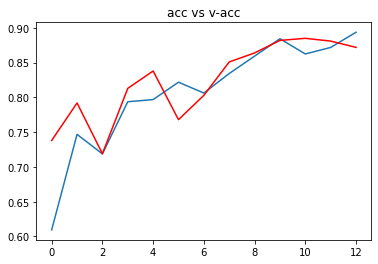

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

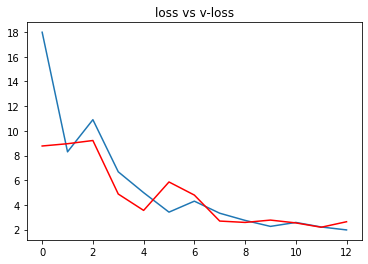

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [20]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13036\1957840212.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.8698698878288269 %
